In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

<ipython-input-5-5d10b811eab4>:21: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


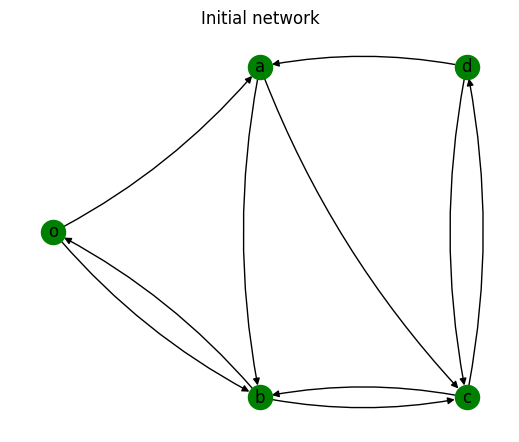

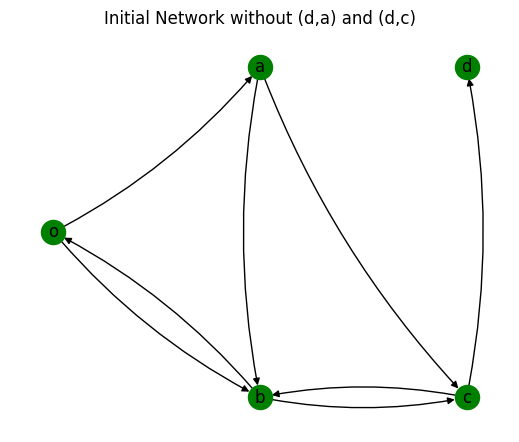

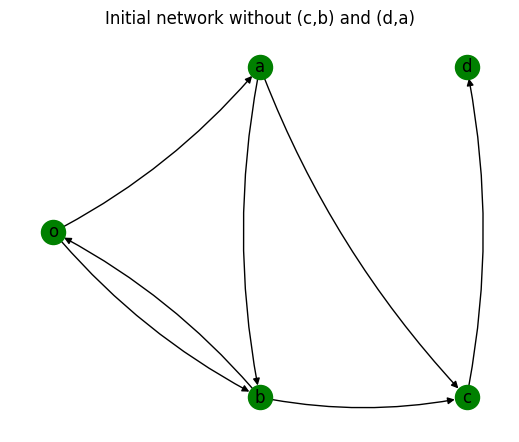

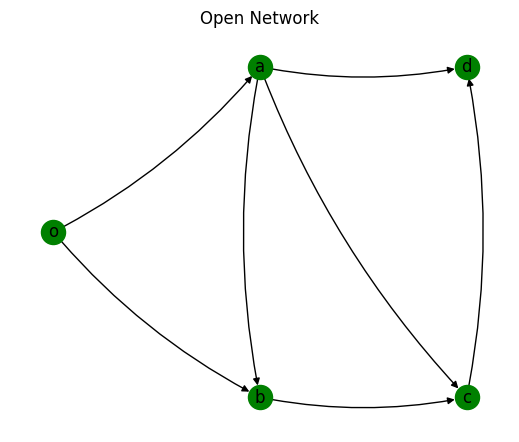

In [ ]:
def plot_network(edges, title):
    G = nx.DiGraph()
    nodes = ['o', 'a', 'b', 'c', 'd']
    G.add_nodes_from(nodes)
    G.add_edges_from(edges)

    pos = {'o':[0,1], 'a':[1,2], 'b':[1,0], 'd':[2,2], 'c':[2,0]}

    plt.figure(figsize=(5,4))
    nx.draw(G, pos,
           node_color='green',
           node_size=300,
           arrows=True,
           with_labels=True,
           edge_color='black',
           width=1,
           connectionstyle="arc3,rad=0.1")

    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

# Initial network (Fig. 1)
edges1 = [
    ('o','a'), ('o','b'),
    ('a','b'), ('a','c'),
    ('b','o'), ('b','c'),
    ('c','b'), ('c','d'),
    ('d','a'), ('d','c')
]
plot_network(edges1, "Initial network")

# Network without (d,a) and (d,c) (Fig. 2)
edges2 = [
    ('o','a'), ('o','b'),
    ('a','b'), ('a','c'),
    ('b','o'), ('b','c'),
    ('c','b'), ('c','d')
]
plot_network(edges2, "Initial Network without (d,a) and (d,c)")

# Network without (c,b) and (d,a) (Fig. 3)
edges3 = [
    ('o','a'), ('o','b'),
    ('a','b'), ('a','c'),
    ('b','o'), ('b','c'),
    ('c','d')
]
plot_network(edges3, "Initial network without (c,b) and (d,a)")

# Open Network (Fig. 6)
edges4 = [
    ('o','a'), ('o','b'),
    ('a','b'), ('a','c'), ('a','d'),
    ('b','c'),
    ('c','d')
]
plot_network(edges4, "Open Network")

###Question 1 - Part a

In [ ]:
# Transition rate matrix
Lambda = np.array([
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/2, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/3, 0, 1/3, 0]
])

# Generate graph from transition rate matrix
G = nx.from_numpy_array(Lambda, create_using=nx.DiGraph)

# Relabel nodes
mapping = {0:'o', 1:'a', 2:'b', 3:'c', 4:'d'}
G = nx.relabel_nodes(G, mapping)

# Define plot positions
pos = {'o':[0,1], 'a':[1,2], 'b':[1,0], 'd':[2,2], 'c':[2,0]}

# Plot graph
plt.figure(figsize=(8,6))
nx.draw(G, pos, with_labels=True, node_color='red',
        connectionstyle="arc3,rad=-0.15",
        arrows=True,
        arrowsize=20)
plt.title("Transition Rate Graph")
plt.savefig('Ex1.png', dpi=180)
plt.close()

# Compute normalized weight matrix
w = np.sum(Lambda, axis=1)
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# Simulate n_iter random walks over the graph
n_iter = 10000

# Return time for node a
reaching_times = []

for i in range(n_iter):
    # Start from node a (index 1)
    first_pos = 1
    pos = [first_pos]
    transition_times = [0]

    # Generate first transition time
    t_next = -np.log(np.random.rand()) / w[first_pos]

    while True:
        # Choose next node based on transition probabilities
        next_node = np.random.choice(len(w), p=P[pos[-1],:])
        pos.append(next_node)

        # Update transition times
        transition_times.append(transition_times[-1] + t_next)

        # Generate next transition time
        t_next = -np.log(np.random.rand()) / w[next_node]

        # Stop when node a is again reached
        if next_node == first_pos:
            break

    # Store total return time
    reaching_times.append(transition_times[-1])

# Print results
print('Average time:', np.average(reaching_times))
print('Standard deviation:', np.std(reaching_times))

Average time: 6.790779101582986
Standard deviation: 5.0297022816186585


###Part b

In [ ]:
import numpy as np

def compute_theoretical_return_time(Lambda):
    # Compute total transition rates
    w = np.sum(Lambda, axis=1)

    # Find maximum transition rate
    w_star = np.max(w)

    # Normalize transition matrix
    Q = Lambda/w_star

    # Add diagonal to ensure row sums are 1
    Q = Q + np.diag(np.ones(len(w)) - np.sum(Q, axis=1))

    # Compute eigenvalues and eigenvectors
    values, vectors = np.linalg.eig(Q.T)

    # Find index of dominant eigenvalue (closest to 1)
    index = np.argmin(np.abs(values - 1))

    # Extract and normalize stationary distribution
    pi_bar = np.abs(vectors[:, index].real)
    pi_bar /= np.sum(pi_bar)

    # Compute theoretical return times
    th_ret_time = 1 / (w * pi_bar)

    return th_ret_time[1]  # Return time for node 'a'

# Original transition rate matrix
Lambda = np.array([
    [0, 2/5, 1/5, 0, 0],
    [0, 0, 3/4, 1/4, 0],
    [1/2, 0, 0, 1/2, 0],
    [0, 0, 1/3, 0, 2/3],
    [0, 1/3, 0, 1/3, 0]
])

print('Theoretical return time of node a:', compute_theoretical_return_time(Lambda))

Theoretical return time of node a: 6.750000000000008


###Part c

In [ ]:
def simulate_hitting_time(Lambda, start_node, target_node, n_iter=1000):
    # Compute transition probabilities
    w = np.sum(Lambda, axis=1)
    D = np.diag(w)
    P = np.linalg.inv(D) @ Lambda

    # Simulate multiple paths
    reaching_times = []

    for i in range(n_iter):
        pos = [start_node]
        time = [0]

        # First transition time
        t_next = -np.log(np.random.rand()) / w[start_node]

        while True:
            # Choose next node
            next_node = np.random.choice(len(w), p=P[pos[-1],:])
            pos.append(next_node)

            # Update time
            time.append(time[-1] + t_next)

            # Generate next transition time
            t_next = -np.log(np.random.rand()) / w[next_node]

            # Stop if target reached
            if next_node == target_node:
                break

        reaching_times.append(time[-1])

    return np.mean(reaching_times), np.std(reaching_times)

# Simulate hitting time from o to d
mean_time, std_time = simulate_hitting_time(Lambda,
                                          start_node=0,  # node o
                                          target_node=4) # node d

print(f'Average hitting time from o to d: {mean_time:.4f}')
print(f'Standard deviation: {std_time:.4f}')

Average hitting time from o to d: 9.0917
Standard deviation: 7.4379


###Part d

In [ ]:
def compute_theoretical_hitting_time(Lambda, start_node, target_node):
    # Compute transition probabilities
    w = np.sum(Lambda, axis=1)
    D = np.diag(w)
    P = np.linalg.inv(D) @ Lambda

    # Define target set S and remaining nodes R
    S = [target_node]
    R = [i for i in range(len(w)) if i not in S]

    # Extract submatrix excluding target node
    hatP = P[np.ix_(R,R)]

    # Solve linear system for hitting times
    # (I - hatP)x = 1/w
    hatx = np.linalg.solve(
        (np.eye(len(R)) - hatP),
        np.ones(len(R))/w[R]
    )

    return hatx[R.index(start_node)]

# Calculate theoretical hitting time
theo_hit_time = compute_theoretical_hitting_time(Lambda,
                                               start_node=0,  # node o
                                               target_node=4) # node d

# Compare with simulation
print(f'Theoretical hitting time from o to d: {theo_hit_time:.4f}')
print(f'Simulated hitting time from o to d: {mean_time:.4f}')
print(f'Relative difference: {100 * abs(theo_hit_time - mean_time)/theo_hit_time:.2f}%')

Theoretical hitting time from o to d: 8.7857
Simulated hitting time from o to d: 9.0917
Relative difference: 3.48%


###Part e

In [ ]:
def simulate_french_degroot(Lambda, x0, n_iterations=100):
    # Compute transition probability matrix
    degrees = np.sum(Lambda, axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ Lambda

    # Store evolution of states
    X = np.zeros((n_iterations + 1, len(x0)))
    X[0] = x0

    # Perform French-DeGroot dynamics
    for i in range(n_iterations):
        X[i+1] = P @ X[i]

    # Compute stationary distribution
    eigenvals, eigenvecs = np.linalg.eig(P.T)
    index = np.argmin(np.abs(eigenvals - 1))  # Find eigenvalue closest to 1

    pi = eigenvecs[:, index].real
    pi = pi/np.sum(pi)

    consensus_value = pi @ x0

    return X, consensus_value, P

# Different initial condition than your friend's code
x0 = np.array([1.5, 4.2, 2.8, 5.6, 3.9])  # Changed values

# Run simulation
states, consensus, P = simulate_french_degroot(Lambda, x0)

print(f'Initial states: {x0}')
print(f'Final states: {states[-1]}')
print(f'Consensus value: {consensus:.4f}')

# Plot evolution of states
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for i in range(len(x0)):
    plt.plot(states[:, i], label=f'Node {i}')
plt.xlabel('Iteration')
plt.ylabel('State')
plt.title('Evolution of French-DeGroot Dynamics')
plt.legend()
plt.grid(True)
plt.savefig('french_degroot_evolution.png')
plt.close()

Initial states: [1.5 4.2 2.8 5.6 3.9]
Final states: [3.79565217 3.79565217 3.79565217 3.79565217 3.79565217]
Consensus value: 3.7957


###Part f

In [ ]:
def simulate_consensus_variance(Lambda, n_iter=50):
    # Compute transition probabilities
    degrees = np.sum(Lambda, axis=1)
    D = np.diag(degrees)
    P = np.linalg.inv(D) @ Lambda

    # Compute stationary distribution
    eigenvals, eigenvecs = np.linalg.eig(P.T)
    index = np.argmin(np.abs(eigenvals - 1))
    pi = eigenvecs[:, index].real
    pi = pi/np.sum(pi)

    # Define variances as per problem
    sigmas = np.array([1, 2, 2, 2, 1])  # [σ²_o, σ²_a, σ²_b, σ²_c, σ²_d]

    # Simulate consensus values
    consensus_values = []
    for i in range(n_iter):
        # Generate initial conditions with correct variances
        x0 = np.array([np.random.normal(0, np.sqrt(sigmas[i])) for i in range(5)])

        # Run dynamics until convergence
        x = x0.copy()
        for _ in range(100):  # Sufficient iterations for convergence
            x = P @ x

        consensus_values.append(x[0])  # Store consensus value

    # Compute simulated variance
    simulated_var = np.var(consensus_values)

    # Compute theoretical variance
    theoretical_var = np.sum((pi**2) * sigmas)

    return simulated_var, theoretical_var, pi

# Run simulation
sim_var, theo_var, pi = simulate_consensus_variance(Lambda)

print(f'Simulated variance of consensus: {sim_var:.4f}')
print(f'Theoretical variance of consensus: {theo_var:.4f}')
print(f'Stationary distribution: {pi}')

Simulated variance of consensus: 0.3997
Theoretical variance of consensus: 0.3800
Stationary distribution: [0.13043478 0.17391304 0.26086957 0.26086957 0.17391304]


###Part g

In [ ]:
# Generate new graph by removing specified edges
G_G = nx.DiGraph(G)
G_G.remove_edges_from([('d','a'),('d','c'),('a','c'),('b','c')])

# Add self loop to nodes with no outgoing edges
for node in G_G.nodes():
    if G_G.out_degree(node) == 0:
        G_G.add_edge(node, node)

# Compute normalized adjacency matrix
W = nx.adjacency_matrix(G_G).toarray()
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Analyze eigenvalues to understand convergence behavior
eigenvals, eigenvecs = np.linalg.eig(P)
print("Eigenvalues:", np.sort(np.abs(eigenvals))[::-1])

# Simulate dynamics with specific initial condition to observe behavior
x0 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
X = []
X.append(x0)
for i in range(50):
    x0 = P @ x0
    X.append(x0)
X = np.array(X)

print("\nInitial state:", X[0])
print("Final state:", X[-1])

# Visualize evolution of states
plt.figure(figsize=(10,6))
for i in range(5):
    plt.plot(X[:,i], label=f'Node {i}')
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('State')
plt.title('Evolution of states')
plt.savefig('state_evolution.png')
plt.close()

Eigenvalues: [1.         1.         0.81649658 0.81649658 0.        ]

Initial state: [1. 2. 3. 4. 5.]
Final state: [2.00001156 1.99993868 2.00002932 3.99997956 5.        ]


In [ ]:
# Part g
G_G = nx.DiGraph(G)
G_G.remove_edges_from([('d','a'), ('d','c'), ('a','c'), ('b','c')])

# Add self loops to nodes with no outgoing edges
for node in G_G.nodes():
    if G_G.out_degree(node) == 0:
        G_G.add_edge(node, node)

# Compute normalized adjacency matrix
W = nx.adjacency_matrix(G_G).toarray()
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Simulate dynamics with random initial condition
x0 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
states = []
states.append(x0.copy())

for i in range(50):
    x0 = P @ x0
    states.append(x0.copy())

states = np.array(states)

# Plot evolution
plt.figure(figsize=(10, 6))
nodes = ['o', 'a', 'b', 'c', 'd']
for i, node in enumerate(nodes):
    plt.plot(states[:, i], label=node)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('State')
plt.title('Evolution of states - Part G')
plt.savefig('Ex1_g_corrected.png', dpi=180)
plt.close()

###Part h

In [ ]:
# Part h
G_H = nx.DiGraph(G)
G_H.remove_edges_from([('b','o'), ('d','a')])

# Add self loops where needed
for node in G_H.nodes():
    if G_H.out_degree(node) == 0:
        G_H.add_edge(node, node)

# Compute normalized adjacency matrix
W = nx.adjacency_matrix(G_H).toarray()
degrees = np.sum(W, axis=1)
D = np.diag(degrees)
P = np.linalg.inv(D) @ W

# Simulate dynamics with random initial condition
x0 = np.array([1.0, 2.0, 3.0, 4.0, 5.0])
states = []
states.append(x0.copy())

for i in range(50):
    x0 = P @ x0
    states.append(x0.copy())

states = np.array(states)

# Plot evolution
plt.figure(figsize=(10, 6))
nodes = ['o', 'a', 'b', 'c', 'd']
for i, node in enumerate(nodes):
    plt.plot(states[:, i], label=node)
plt.legend()
plt.xlabel('Iteration')
plt.ylabel('State')
plt.title('Evolution of states - Part H')
plt.savefig('Ex1_h_corrected.png', dpi=180)
plt.close()

###Part a 'Particle perspective' Question 2

In [ ]:
def simulate_particle_returns(Lambda, n_particles=100):
    # Compute transition probabilities
    w = np.sum(Lambda, axis=1)
    D = np.diag(w)
    P = np.linalg.inv(D) @ Lambda

    # Track return times for all particles
    reaching_times = []

    for i in range(n_particles):
        # Initialize at node a
        first_pos = 1  # index for node 'a'
        pos = [first_pos]
        transition_times = [0]

        # Initial transition time
        t_next = -np.log(np.random.rand()) / w[first_pos]

        while True:
            # Choose next position
            next_pos = np.random.choice(len(w), p=P[pos[-1],:])
            pos.append(next_pos)

            # Update time
            transition_times.append(transition_times[-1] + t_next)

            # Generate next transition time
            t_next = -np.log(np.random.rand()) / w[next_pos]

            # Check if returned to starting node
            if next_pos == first_pos:
                break

        reaching_times.append(transition_times[-1])

    return np.mean(reaching_times), np.std(reaching_times)

# Run simulation
mean_time, std_time = simulate_particle_returns(Lambda, n_particles=100)
print(f'Average return time: {mean_time:.4f}')
print(f'Standard deviation: {std_time:.4f}')

Average return time: 6.9925
Standard deviation: 4.9620


Part b question 2

In [ ]:
def simulate_node_perspective(Lambda, n_particles=100, sim_time=60):
    # Compute transition probabilities
    w = np.sum(Lambda, axis=1)
    D = np.diag(w)
    P = np.linalg.inv(D) @ Lambda

    # Initialize system with all particles in node o
    particles = [n_particles, 0, 0, 0, 0]
    states = [particles.copy()]
    times = [0]
    current_time = 0

    # Initialize node rates based on particle counts
    rates = [particles[i] * w[i] for i in range(len(w))]

    while current_time < sim_time:
        # Compute next transition time for each node
        node_times = [-np.log(np.random.rand())/rate if rate > 0 else float('inf')
                     for rate in rates]

        # Find next event
        transition_node = np.argmin(node_times)
        current_time += node_times[transition_node]

        if current_time > sim_time:
            break

        # Move particle according to transition probabilities
        next_node = np.random.choice(len(w), p=P[transition_node,:])

        # Update particle counts
        particles[transition_node] -= 1
        particles[next_node] += 1

        # Store state and time
        states.append(particles.copy())
        times.append(current_time)

        # Update rates
        rates = [particles[i] * w[i] for i in range(len(w))]

    states_array = np.array(states)
    avg_particles = np.mean(states_array, axis=0)

    return times, states_array, avg_particles

# Run simulation
times, states, averages = simulate_node_perspective(Lambda)

# Plot results
plt.figure(figsize=(12, 6))
node_labels = ['o', 'a', 'b', 'c', 'd']
for i, label in enumerate(node_labels):
    plt.plot(times, states[:, i], label=label)

plt.xlabel('Time')
plt.ylabel('Number of Particles')
plt.title('Particle Distribution Evolution')
plt.legend()
plt.grid(True, alpha=0.3)
plt.savefig('Ex2.png', dpi=180)
plt.close()

# Print results
print('Average number of particles per node:', list(averages))

# Compute and print theoretical distribution
eigenvals, eigenvecs = np.linalg.eig(P.T)
index = np.argmin(np.abs(eigenvals - 1))
pi = eigenvecs[:, index].real
pi = pi/np.sum(pi)
print('Stationary distribution:', list(pi))

Average number of particles per node: [21.057278293501877, 15.144973335966817, 22.64250444400553, 21.46533675686352, 19.689907169662256]
Stationary distribution: [0.0, 0.0, 0.1666666666666668, 0.5000000000000001, 0.33333333333333315]


Part a Question 3

In [ ]:
# Define transition rate matrix for open network
Lambda = np.array([
    [0, 3/4, 3/4, 0, 0],
    [0, 0, 1/4, 1/4, 2/4],
    [0, 0, 0, 1, 0],
    [0, 0, 0, 0, 1],
    [0, 0, 0, 0, 0]
])

# Compute transition probabilities
w = np.sum(Lambda, axis=1)
w[4] = 2  # Set output rate for node d
D = np.diag(w)
P = np.linalg.inv(D) @ Lambda

# Initial state
particles_per_node = [0, 0, 0, 0, 0]
states = [particles_per_node.copy()]
times = [0]
current_time = 0

# Input rate λ = 100
input_rate = 100

# Initial rates (proportional to number of particles)
rates = [particles_per_node[i]*w[i] for i in range(len(w))]

while current_time < 60:
    transition_times = []

    # Input clock
    transition_times.append(-np.log(np.random.rand())/input_rate)

    # Node transition clocks (proportional rates)
    for i in range(len(w)):
        if rates[i] > 0:
            transition_times.append(-np.log(np.random.rand())/rates[i])
        else:
            transition_times.append(float('inf'))

    transition_node = np.argmin(transition_times)
    current_time += transition_times[transition_node]

    if current_time > 60:
        break

    if transition_node == 0:  # Input
        particles_per_node[0] += 1
    elif transition_node == 5:  # Output from node d
        particles_per_node[4] -= 1
    else:  # Node transition
        next_node = np.random.choice(len(w), p=P[transition_node-1,:])
        particles_per_node[transition_node-1] -= 1
        particles_per_node[next_node] += 1

    states.append(particles_per_node.copy())
    times.append(current_time)

    # Update rates for next iteration
    rates = [particles_per_node[i]*w[i] for i in range(len(w))]

# Plot results
nodes = ['o', 'a', 'b', 'c', 'd']
nodes_evolution = dict(zip(nodes, np.array(states).T))

plt.figure(dpi=200, figsize=(10,5))
for node in nodes_evolution.keys():
    plt.plot(times, nodes_evolution[node], label=node)
plt.legend(prop=dict(size=10))
plt.xlabel("Time")
plt.ylabel("Number of Particles")
plt.title("Proportional Rate Evolution (λ = 100)")
plt.savefig('Ex3.png', dpi=180)
plt.close()

Part b Question 3

In [ ]:
def simulate_fixed_rate(input_rate, simulation_time=60):
    # Initial state
    particles_per_node = [0,0,0,0,0]
    states = [particles_per_node.copy()]
    times = [0]
    current_time = 0

    while current_time < simulation_time:
        # Register ticks of all Poisson clocks
        transition_times = []

        # Input clock with fixed rate λ
        transition_times.append(-np.log(np.random.rand())/input_rate)

        # Node transitions with fixed rates
        for i in range(len(w)):
            if particles_per_node[i] > 0:
                transition_times.append(-np.log(np.random.rand())/w[i])
            else:
                transition_times.append(float('inf'))

        # Find next event
        transition_node = np.argmin(transition_times)
        current_time += transition_times[transition_node]

        if current_time > simulation_time:
            break

        # Handle events
        if transition_node == 0:  # Input
            particles_per_node[0] += 1
        elif transition_node == 5:  # Output
            particles_per_node[4] -= 1
        else:  # Node transition
            next_node = np.random.choice(len(w), p=P[transition_node-1,:])
            particles_per_node[transition_node-1] -= 1
            particles_per_node[next_node] += 1

        states.append(particles_per_node.copy())
        times.append(current_time)

    return times, np.array(states)

# Simulate with λ = 1
times1, states1 = simulate_fixed_rate(1)

# Plot λ = 1 case
plt.figure(dpi=200, figsize=(10,5))
for i, node in enumerate(nodes):
    plt.plot(times1, states1[:,i], label=node)
plt.legend(prop=dict(size=10))
plt.xlabel("Time")
plt.ylabel("Number of Particles")
plt.title("Fixed Rate Evolution (λ = 1)")
plt.savefig('Ex3_2.png', dpi=180)
plt.close()

# Test stability around critical value
critical_rate = w[0]  # theoretical critical rate
test_rates = [critical_rate - 0.2, critical_rate + 0.2]

for rate in test_rates:
    times, states = simulate_fixed_rate(rate)

    plt.figure(dpi=200, figsize=(10,5))
    for i, node in enumerate(nodes):
        plt.plot(times, states[:,i], label=node)
    plt.legend(prop=dict(size=10))
    plt.xlabel("Time")
    plt.ylabel("Number of Particles")
    plt.title(f"Fixed Rate Evolution (λ = {rate:.2f})")
    plt.savefig(f'Ex3_3_{rate:.1f}.png', dpi=180)
    plt.close()